In [1]:
import os
import subprocess
import pandas as pd
import io
import matplotlib.pyplot as plt

In [2]:
def runDbscan(dfData, n, r):
    inputText = dfData.to_csv(header=None, sep=' ', index=False)
    cmd = '../bin/andrade'
    result = subprocess.run(
        [ cmd, '--', f'{n}', f'{r}' ],
        input=inputText,
        stdout=subprocess.PIPE, universal_newlines=True, check=True
    )
    return pd.read_csv(io.StringIO(result.stdout), sep=" ", header=None, names=['x', 'y', 'cluster_id'])

t = pd.read_csv('../../sample_data/data.dat', sep=' ', header=None, names=['x', 'y'])
#t.to_csv(header=None, sep=' ', index=False)

In [7]:
df = runDbscan(t, 5, 0.1)

CalledProcessError: Command '['../bin/andrade', '--', '5', '0.1']' returned non-zero exit status 188.

In [5]:
clusters = df.groupby('cluster_id')

[]

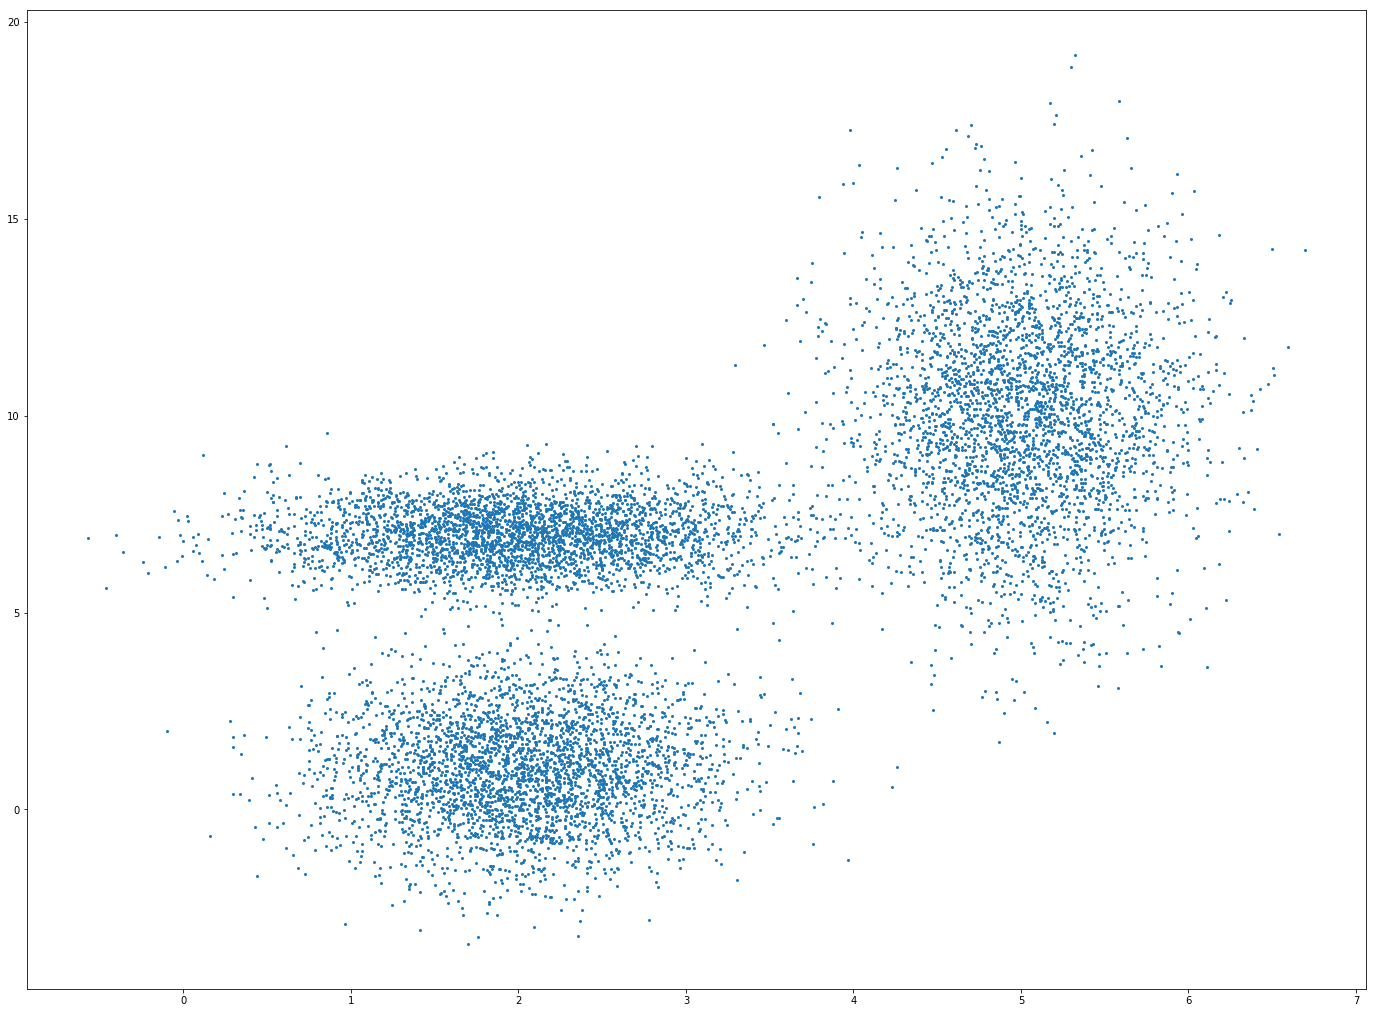

In [6]:
plt.figure(figsize=(24,18))
for clusterId, grp in clusters:
    plt.scatter(grp['x'], grp['y'], s=4)
plt.plot()